# IMPLEMENTATION

Visualizations created:
1. QPCA Circuit: Shows the quantum circuit implementation of PCA
2. PCA Concept: Illustrates how PCA works with a simple 2D example

The circuit diagram shows the key stages of the QPCA algorithm:
- Initialization of quantum state
- Phase estimation to extract eigenvalues
- Threshold operation to filter eigenvalues below τ
- Controlled operations to mark significant components
- Inverse operations and measurement


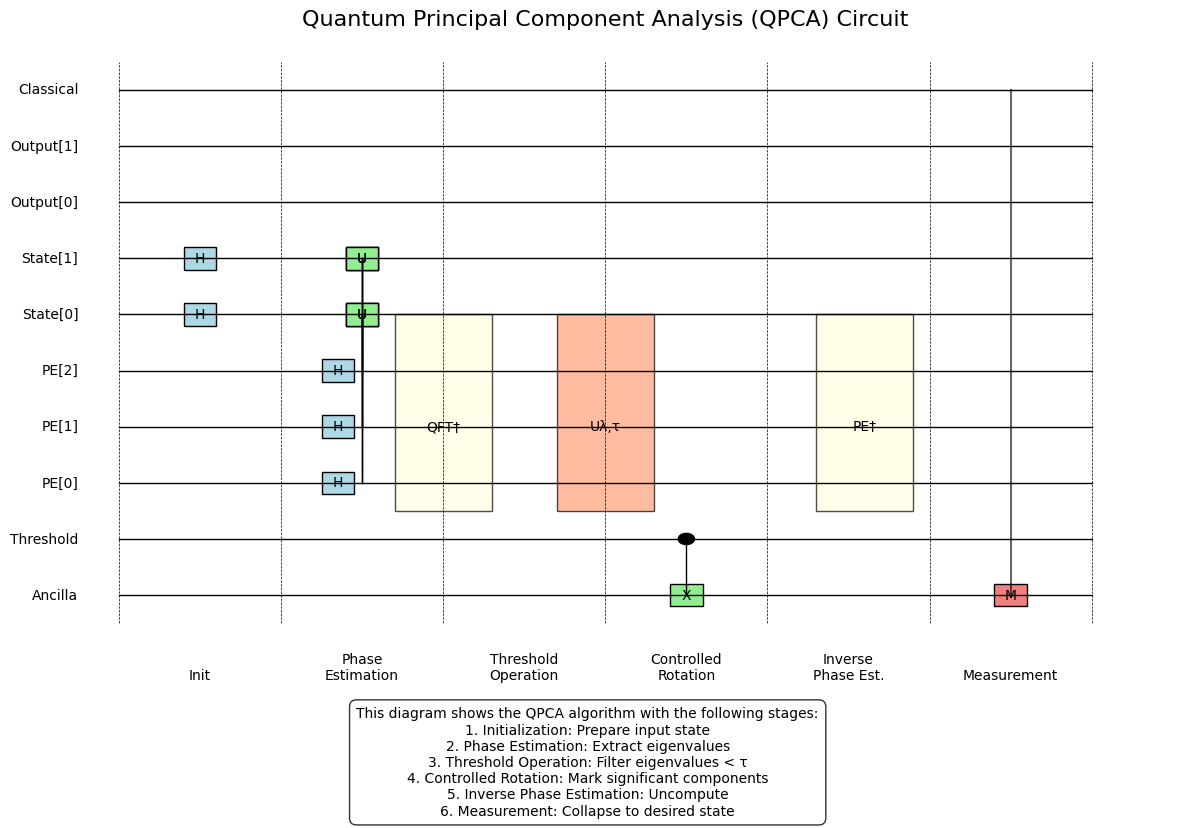

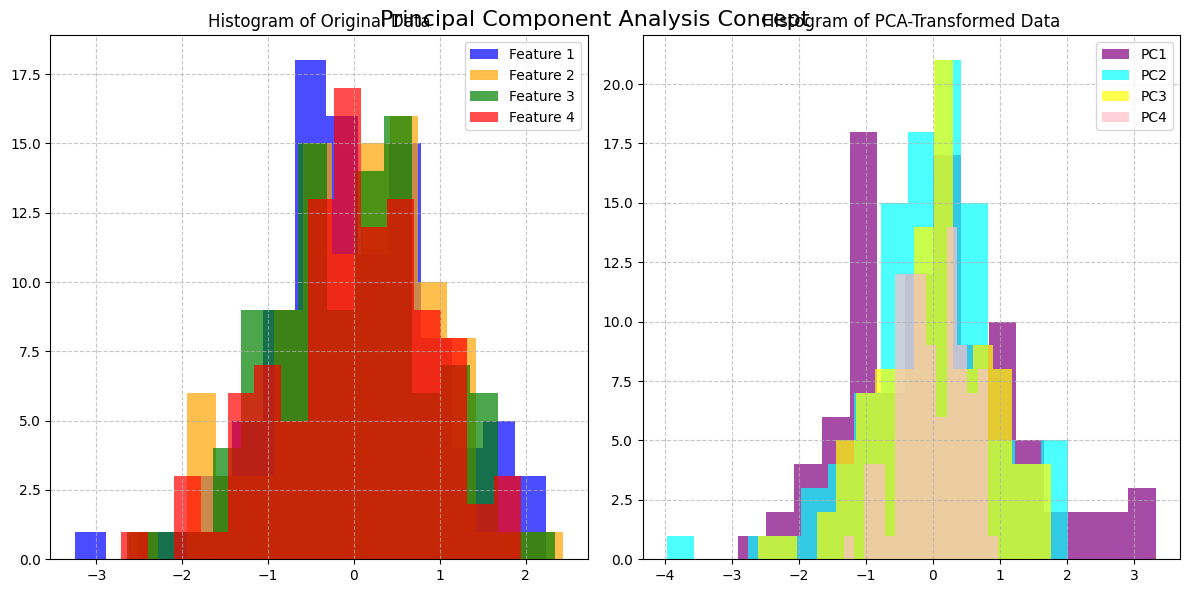

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Arrow
from matplotlib.lines import Line2D

def visualize_qpca_circuit():
    # Set up the figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define constants
    num_qubits = 10  # Total number of qubits in our visualization
    circuit_length = 6  # Number of time steps to show
    qubit_spacing = 1
    time_step_width = 2
    
    # Labels for different qubit registers
    qubit_labels = [
        'Ancilla',
        'Threshold',
        'PE[0]',
        'PE[1]',
        'PE[2]',
        'State[0]',
        'State[1]',
        'Output[0]',
        'Output[1]',
        'Classical'
    ]
    
    # Circuit stage labels
    stage_labels = [
        'Init',
        'Phase\nEstimation',
        'Threshold\nOperation',
        'Controlled\nRotation',
        'Inverse\nPhase Est.',
        'Measurement'
    ]
    
    # Draw horizontal lines for qubits
    for i in range(num_qubits):
        ax.add_line(Line2D([0, circuit_length * time_step_width], 
                           [i * qubit_spacing, i * qubit_spacing], 
                           color='black', linestyle='-', linewidth=1))
        # Add qubit labels
        ax.text(-0.5, i * qubit_spacing, qubit_labels[i], 
                verticalalignment='center', horizontalalignment='right')
    
    # Draw vertical separators for time steps and add labels
    for i in range(circuit_length + 1):
        ax.add_line(Line2D([i * time_step_width, i * time_step_width], 
                           [-0.5, (num_qubits - 1) * qubit_spacing + 0.5], 
                           color='black', linestyle='--', linewidth=0.5))
        if i < circuit_length:
            ax.text(i * time_step_width + time_step_width/2, -1.5, stage_labels[i], 
                    horizontalalignment='center')
    
    # Draw gates for each circuit stage
    
    # 1. Initialization stage
    # Hadamard gates on the state qubits
    for i in range(5, 7):  # State qubits
        draw_gate(ax, 0.5 * time_step_width, i * qubit_spacing, 'H', 'lightblue')
    
    # 2. Phase Estimation
    # Control lines from PE qubits to state qubits
    for i in range(2, 5):  # PE qubits
        # Hadamard gates on PE qubits
        draw_gate(ax, 1.5 * time_step_width - 0.3, i * qubit_spacing, 'H', 'lightblue')
        
        # Controlled-U operations from PE to state
        for j in range(5, 7):  # State qubits
            ax.add_line(Line2D([1.5 * time_step_width, 1.5 * time_step_width], 
                               [i * qubit_spacing, j * qubit_spacing], 
                               color='black', linestyle='-', linewidth=1))
        
        # Target gates on state qubits
        draw_gate(ax, 1.5 * time_step_width, 5 * qubit_spacing, 'U', 'lightgreen')
        draw_gate(ax, 1.5 * time_step_width, 6 * qubit_spacing, 'U', 'lightgreen')
    
    # Inverse QFT box on PE qubits
    ax.add_patch(Rectangle((1.7 * time_step_width, 1.5 * qubit_spacing), 
                           0.6 * time_step_width, 3.5 * qubit_spacing,
                           facecolor='lightyellow', edgecolor='black', alpha=0.7))
    ax.text(2 * time_step_width, 3 * qubit_spacing, 'QFT†', 
            horizontalalignment='center', verticalalignment='center')
    
    # 3. Threshold Operation
    # Control lines from PE qubits to threshold
    ax.add_patch(Rectangle((2.7 * time_step_width, 1.5 * qubit_spacing), 
                           0.6 * time_step_width, 3.5 * qubit_spacing,
                           facecolor='lightsalmon', edgecolor='black', alpha=0.7))
    ax.text(3 * time_step_width, 3 * qubit_spacing, 'Uλ,τ', 
            horizontalalignment='center', verticalalignment='center')
    
    # 4. Controlled Rotation
    # Control from threshold to ancilla
    ax.add_line(Line2D([3.5 * time_step_width, 3.5 * time_step_width], 
                       [1 * qubit_spacing, 0 * qubit_spacing], 
                       color='black', linestyle='-', linewidth=1))
    draw_circle(ax, 3.5 * time_step_width, 1 * qubit_spacing, filled=True)
    draw_gate(ax, 3.5 * time_step_width, 0 * qubit_spacing, 'X', 'lightgreen')
    
    # 5. Inverse Phase Estimation
    # Similar to phase estimation but in reverse
    ax.add_patch(Rectangle((4.3 * time_step_width, 1.5 * qubit_spacing), 
                           0.6 * time_step_width, 3.5 * qubit_spacing,
                           facecolor='lightyellow', edgecolor='black', alpha=0.7))
    ax.text(4.6 * time_step_width, 3 * qubit_spacing, 'PE†', 
            horizontalalignment='center', verticalalignment='center')
    
    # 6. Measurement
    # Measurement from ancilla to classical bit
    ax.add_line(Line2D([5.5 * time_step_width, 5.5 * time_step_width], 
                       [0 * qubit_spacing, 9 * qubit_spacing], 
                       color='black', linestyle='-', linewidth=1.5, alpha=0.6))
    draw_measurement(ax, 5.5 * time_step_width, 0 * qubit_spacing)
    
    # Set plot limits and remove axes
    ax.set_xlim(-1, circuit_length * time_step_width + 1)
    ax.set_ylim(-2, (num_qubits - 1) * qubit_spacing + 1)
    ax.axis('off')
    
    # Add title
    plt.title('Quantum Principal Component Analysis (QPCA) Circuit', fontsize=16)
    
    # Add explanatory text at the bottom
    explanation = (
        "This diagram shows the QPCA algorithm with the following stages:\n"
        "1. Initialization: Prepare input state\n"
        "2. Phase Estimation: Extract eigenvalues\n"
        "3. Threshold Operation: Filter eigenvalues < τ\n"
        "4. Controlled Rotation: Mark significant components\n"
        "5. Inverse Phase Estimation: Uncompute\n"
        "6. Measurement: Collapse to desired state"
    )
    fig.text(0.5, 0.02, explanation, ha='center', va='center', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))
    
    plt.tight_layout(rect=[0, 0.07, 1, 0.98])
    return fig

def draw_gate(ax, x, y, label, color):
    """Draw a quantum gate at position (x,y)"""
    width, height = 0.4, 0.4
    ax.add_patch(Rectangle((x - width/2, y - height/2), width, height,
                           facecolor=color, edgecolor='black'))
    ax.text(x, y, label, horizontalalignment='center', verticalalignment='center')

def draw_circle(ax, x, y, filled=False):
    """Draw a control point at position (x,y)"""
    radius = 0.1
    if filled:
        ax.add_patch(Circle((x, y), radius, facecolor='black', edgecolor='black'))
    else:
        ax.add_patch(Circle((x, y), radius, facecolor='white', edgecolor='black'))

def draw_measurement(ax, x, y):
    """Draw a measurement symbol at position (x,y)"""
    width, height = 0.4, 0.4
    ax.add_patch(Rectangle((x - width/2, y - height/2), width, height,
                           facecolor='lightcoral', edgecolor='black'))
    ax.text(x, y, 'M', horizontalalignment='center', verticalalignment='center')

import numpy as np
import matplotlib.pyplot as plt

def visualize_pca_concept():
    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Define 4x4 correlation matrix
    A = np.array([
        [1.0, 0.5, 0.3, 0.1],
        [0.5, 1.0, 0.2, 0.4],
        [0.3, 0.2, 1.0, 0.6],
        [0.1, 0.4, 0.6, 1.0]
    ])
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(A)
    
    # Sort by descending eigenvalues
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Generate synthetic data based on the correlation matrix
    np.random.seed(42)
    n_points = 100
    data = np.random.multivariate_normal([0, 0, 0, 0], A, n_points)
    
    # Project data onto principal components
    projected_data = data @ eigenvectors
    
    # Plot histogram of original data
    ax1.hist(data[:, 0], bins=15, alpha=0.7, color='blue', label='Feature 1')
    ax1.hist(data[:, 1], bins=15, alpha=0.7, color='orange', label='Feature 2')
    ax1.hist(data[:, 2], bins=15, alpha=0.7, color='green', label='Feature 3')
    ax1.hist(data[:, 3], bins=15, alpha=0.7, color='red', label='Feature 4')
    ax1.set_title('Histogram of Original Data')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot histogram of PCA-transformed data
    ax2.hist(projected_data[:, 0], bins=15, alpha=0.7, color='purple', label='PC1')
    ax2.hist(projected_data[:, 1], bins=15, alpha=0.7, color='cyan', label='PC2')
    ax2.hist(projected_data[:, 2], bins=15, alpha=0.7, color='yellow', label='PC3')
    ax2.hist(projected_data[:, 3], bins=15, alpha=0.7, color='pink', label='PC4')
    ax2.set_title('Histogram of PCA-Transformed Data')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.suptitle('Principal Component Analysis Concept', fontsize=16)
    
    return fig

# Generate both visualizations
circuit_fig = visualize_qpca_circuit()
concept_fig = visualize_pca_concept()


# Display information about what the visualizations show
print("Visualizations created:")
print("1. QPCA Circuit: Shows the quantum circuit implementation of PCA")
print("2. PCA Concept: Illustrates how PCA works with a simple 2D example")
print("\nThe circuit diagram shows the key stages of the QPCA algorithm:")
print("- Initialization of quantum state")
print("- Phase estimation to extract eigenvalues")
print("- Threshold operation to filter eigenvalues below τ")
print("- Controlled operations to mark significant components")
print("- Inverse operations and measurement")